## Wavelet Transform-  

Extracted features: [116.77119135557523, 28177.484092378174, -0.710753639998779, 2235.180995741664, -0.011110771954458127, 2217.2062041964236, -0.016788254326791, 270.89726401697516]


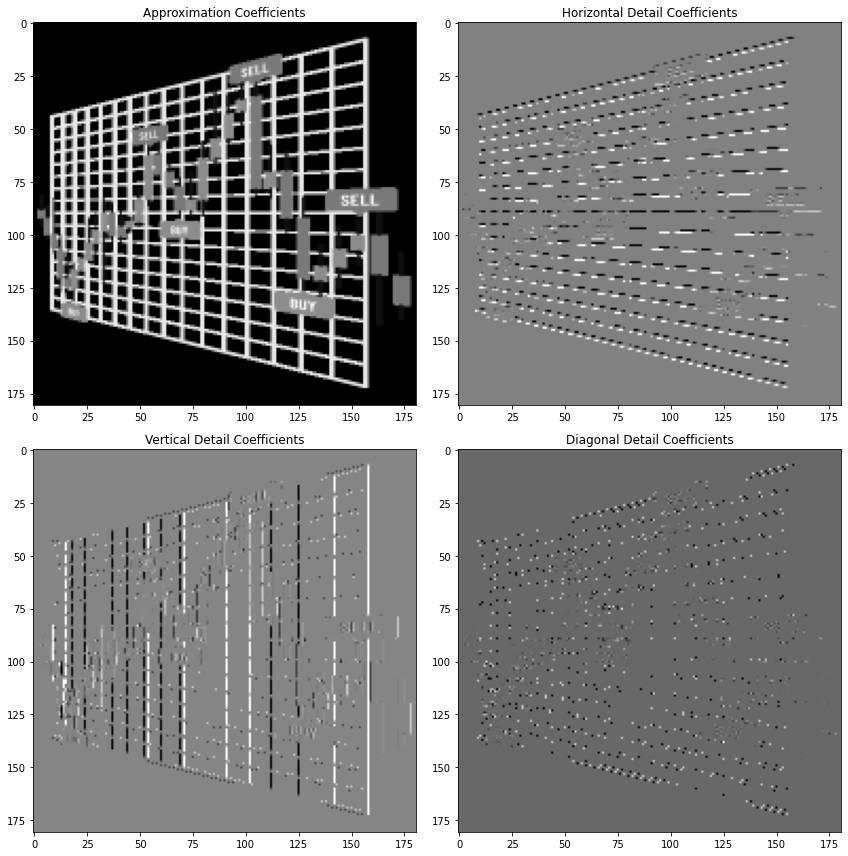

In [3]:
import numpy as np
import cv2
import pywt

# Load the image
image_path = 'test_2.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply DWT
coeffs = pywt.dwt2(image, 'haar')
cA, (cH, cV, cD) = coeffs

# Extract features (for this example, I'll use the mean and variance)
features = [
    np.mean(cA), np.var(cA),
    np.mean(cH), np.var(cH),
    np.mean(cV), np.var(cV),
    np.mean(cD), np.var(cD)
]

print("Extracted features:", features)

# Optionally, to visualize the transformed image components
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(cA, cmap='gray')
plt.title('Approximation Coefficients')

plt.subplot(2, 2, 2)
plt.imshow(cH, cmap='gray')
plt.title('Horizontal Detail Coefficients')

plt.subplot(2, 2, 3)
plt.imshow(cV, cmap='gray')
plt.title('Vertical Detail Coefficients')

plt.subplot(2, 2, 4)
plt.imshow(cD, cmap='gray')
plt.title('Diagonal Detail Coefficients')

plt.tight_layout()
plt.show()


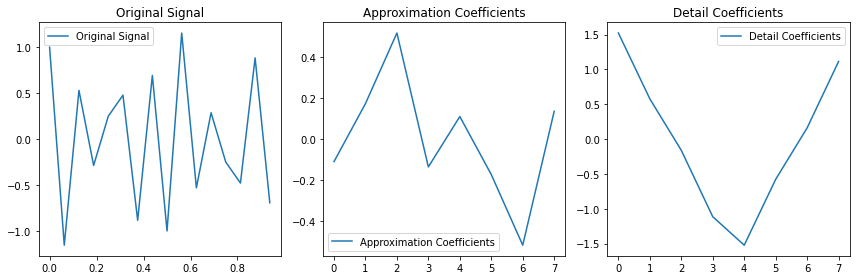

In [14]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate a simple signal
t = np.linspace(0, 1, 16, endpoint=False)
signal = np.cos(7 * 2 * np.pi * t) + 0.25 * np.sin(13 * 2 * np.pi * t)

# Applying DWT
coeffs = pywt.dwt(signal, 'db1') # 'db1' represents Daubechies wavelet with one vanishing moment.
cA, cD = coeffs  # cA = Approximation coefficients, cD = Detail coefficients

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(t, signal, label='Original Signal')
plt.legend()
plt.title("Original Signal")

plt.subplot(1, 3, 2)
plt.plot(cA, label='Approximation Coefficients')
plt.legend()
plt.title("Approximation Coefficients")

plt.subplot(1, 3, 3)
plt.plot(cD, label='Detail Coefficients')
plt.legend()
plt.title("Detail Coefficients")

plt.tight_layout()
plt.show()


In [16]:
!pip install pywavelets



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


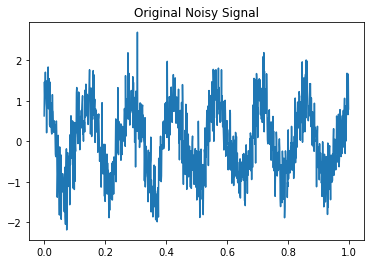

In [19]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.cos(7 * 2 * np.pi * t) + 0.25 * np.sin(13 * 2 * np.pi * t)
noisy_signal = signal + 0.5 * np.random.randn(t.size)

plt.plot(t, noisy_signal)
plt.title("Original Noisy Signal")
plt.show()


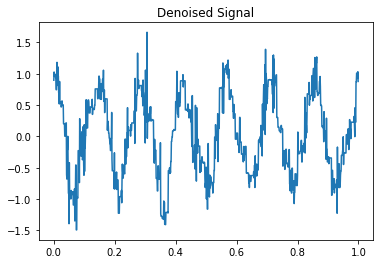

In [20]:
import pywt

coeffs = pywt.wavedec(noisy_signal, 'db1', level=4)
coeffs_thresholded = [pywt.threshold(c, value=0.5, mode='soft') for c in coeffs]
denoised_signal = pywt.waverec(coeffs_thresholded, 'db1')

plt.plot(t, denoised_signal)
plt.title("Denoised Signal")
plt.show()


/Users/rohitgulve/opt/anaconda3/lib/python3.9/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


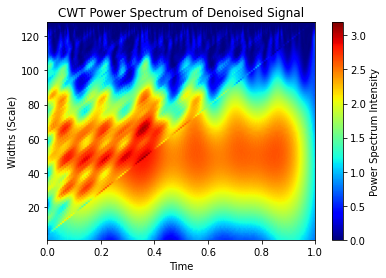

In [21]:
widths = np.arange(1, 128)
coeffs, freqs = pywt.cwt(denoised_signal, widths, 'cmor')

# Compute the power spectrum
power_spectrum = np.abs(coeffs) ** 2

plt.imshow(np.log(1 + power_spectrum), aspect='auto', extent=[0, 1, 1, 128], cmap='jet')
plt.colorbar(label="Power Spectrum Intensity")
plt.ylabel("Widths (Scale)")
plt.xlabel("Time")
plt.title("CWT Power Spectrum of Denoised Signal")
plt.show()


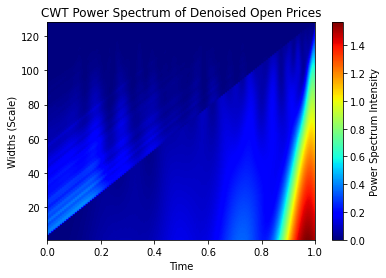

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Sample OHLC data (replace with your own data)
time = np.linspace(0, 1, 1000)
open_data = np.sin(time) + 0.1 * np.random.randn(time.size)  # For example purposes
high_data = open_data + 0.1
low_data = open_data - 0.1
close_data = np.cos(time) + 0.1 * np.random.randn(time.size)  # For example purposes

# Function to denoise data
def denoise(data):
    coeffs = pywt.wavedec(data, 'db1', level=4)
    coeffs_thresholded = [pywt.threshold(c, value=0.5, mode='soft') for c in coeffs]
    return pywt.waverec(coeffs_thresholded, 'db1')

# Denoise each series
denoised_open = denoise(open_data)
denoised_high = denoise(high_data)
denoised_low = denoise(low_data)
denoised_close = denoise(close_data)

# Function to compute CWT and then generate power spectrum
def compute_power_spectrum(data):
    widths = np.arange(1, 128)
    coeffs, freqs = pywt.cwt(data, widths, 'cmor')
    return np.abs(coeffs) ** 2

# Compute power spectrum for each series
power_spectrum_open = compute_power_spectrum(denoised_open)
power_spectrum_high = compute_power_spectrum(denoised_high)
power_spectrum_low = compute_power_spectrum(denoised_low)
power_spectrum_close = compute_power_spectrum(denoised_close)

# Visualize power spectrum
plt.imshow(np.log(1 + power_spectrum_open), aspect='auto', extent=[0, 1, 1, 128], cmap='jet')
plt.colorbar(label="Power Spectrum Intensity")
plt.ylabel("Widths (Scale)")
plt.xlabel("Time")
plt.title("CWT Power Spectrum of Denoised Open Prices")
plt.show()


/Users/rohitgulve/opt/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


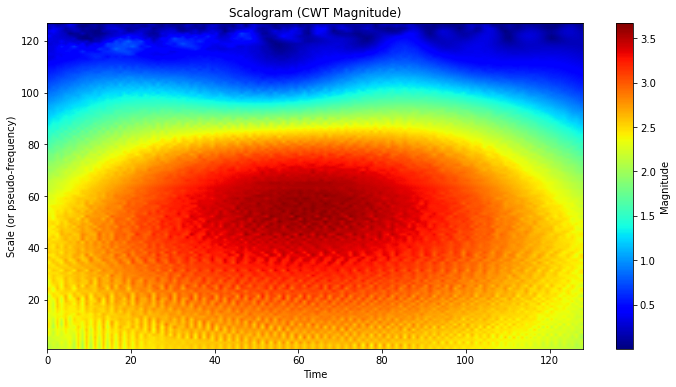

In [30]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Sample data (replace with your own time series data)
signal = np.sin(2 * np.pi * np.linspace(0, 1, 128)) + 0.25 * np.random.randn(128)

# 1. Denoise the signal using DWT

coeffs = pywt.wavedec(signal, 'db4', level=5)
threshold = 0.2  
coeffs_thresholded = [pywt.threshold(i, threshold, mode='hard') for i in coeffs]
denoised_signal = pywt.waverec(coeffs_thresholded, 'db4')

# 2. Generate scalogram using CWT

widths = np.arange(1, 128)  # defining the range of scales for CWT
cwt_coeffs, freqs = pywt.cwt(denoised_signal, widths, 'cmor')

plt.figure(figsize=(12, 6))
plt.imshow(np.abs(cwt_coeffs), aspect='auto', extent=[0, len(denoised_signal), 1, max(widths)], cmap='jet', interpolation="bilinear")
plt.colorbar(label='Magnitude')
plt.ylabel('Scale (or pseudo-frequency)')
plt.xlabel('Time')
plt.title('Scalogram (CWT Magnitude)')
plt.show()


/var/folders/rg/86gy4sjd5db0f2q4b9rzz9fw0000gn/T/ipykernel_60830/4239093359.py:7: RuntimeWarning: invalid value encountered in log
  log_returns = np.diff(np.log(prices))


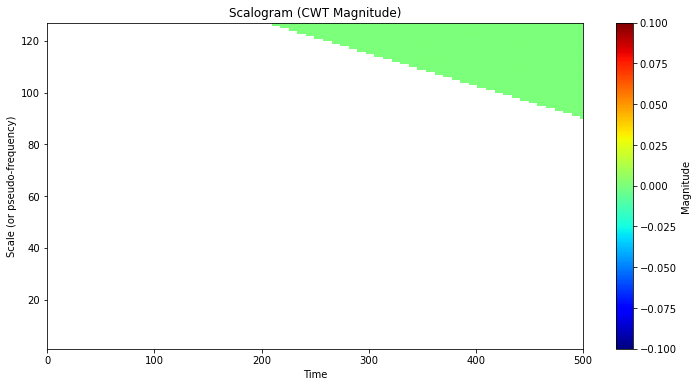

In [31]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Sample stock price data (replace with your stock data)
prices = np.cumsum(np.random.randn(500) + 0.5)
log_returns = np.diff(np.log(prices))

# 1. Denoise using DWT
coeffs = pywt.wavedec(log_returns, 'db4', level=5)
threshold = 0.2  # You can adjust the threshold for your specific data
coeffs_thresholded = [pywt.threshold(i, threshold, mode='hard') for i in coeffs]
denoised_log_returns = pywt.waverec(coeffs_thresholded, 'db4')

# 2. Generate scalogram using CWT
widths = np.arange(1, 128)  # Defining the range of scales for CWT
cwt_coeffs, freqs = pywt.cwt(denoised_log_returns, widths, 'cmor')

plt.figure(figsize=(12, 6))
plt.imshow(np.abs(cwt_coeffs), aspect='auto', extent=[0, len(denoised_log_returns), 1, max(widths)], cmap='jet', interpolation="bilinear")
plt.colorbar(label='Magnitude')
plt.ylabel('Scale (or pseudo-frequency)')
plt.xlabel('Time')
plt.title('Scalogram (CWT Magnitude)')
plt.show()


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt


In [34]:
# Sample data
data = {
    'Open': np.random.rand(100),
    'Close': np.random.rand(100),
    'High': np.random.rand(100),
    'Low': np.random.rand(100)
}

df = pd.DataFrame(data)


In [35]:
df

,Open,Close,High,Low
0,0.216743,0.490734,0.332243,0.857030
1,0.364519,0.438440,0.782847,0.974424
2,0.960841,0.674195,0.661424,0.030730
3,0.346205,0.078621,0.276408,0.141409
4,0.003558,0.320886,0.223533,0.392105
...,...,...,...,...
95,0.403390,0.684592,0.464455,0.742362
96,0.504204,0.379263,0.546226,0.535053
97,0.738949,0.771589,0.772575,0.344896
98,0.280077,0.352501,0.419603,0.557164


In [36]:
prices = df['Close'].values


In [37]:
prices

array([0.49073412, 0.43844003, 0.67419531, 0.07862111, 0.32088648,
       0.0376927 , 0.29491374, 0.66376932, 0.96312961, 0.91716508,
       0.69362399, 0.61835428, 0.85620905, 0.81602875, 0.20634673,
       0.75073798, 0.44704778, 0.34698774, 0.27349907, 0.16349566,
       0.62901633, 0.61869465, 0.43004145, 0.518862  , 0.6509482 ,
       0.26891315, 0.90948363, 0.23647865, 0.66123518, 0.72629361,
       0.85339009, 0.74277945, 0.87402646, 0.13872155, 0.75396339,
       0.86606998, 0.37501422, 0.16758627, 0.51513812, 0.05564887,
       0.10461274, 0.46425694, 0.85038041, 0.23142198, 0.57820748,
       0.22325849, 0.34874529, 0.11603103, 0.2409673 , 0.95570846,
       0.72996487, 0.21269799, 0.20777222, 0.64139529, 0.250384  ,
       0.67925054, 0.27710595, 0.18425408, 0.66478809, 0.14487451,
       0.06889177, 0.88763123, 0.64510964, 0.08666976, 0.29599302,
       0.18807644, 0.00567521, 0.09896868, 0.26129505, 0.14763429,
       0.56217275, 0.43971617, 0.97094686, 0.81614359, 0.01879

In [38]:
coeffs = pywt.wavedec(prices, 'db1', level=4)
cA4, cD4, cD3, cD2, cD1 = coeffs


In [40]:
cA4

array([2.20521207, 2.11929166, 1.66577081, 1.71936642, 1.54606077,
       1.63759103, 1.68169031])

In [41]:
widths = np.arange(1, 40)
cwt_matrix, _ = pywt.cwt(prices, widths, 'mexh')


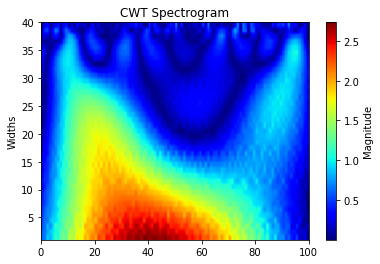

In [42]:
plt.imshow(np.abs(cwt_matrix), aspect='auto', extent=[0, len(prices), 1, 40], cmap='jet')
plt.colorbar(label="Magnitude")
plt.ylabel("Widths")
plt.title("CWT Spectrogram")
plt.show()


In [43]:
import numpy as np
import pandas as pd

# Generate synthetic stock data
np.random.seed(0)
days = 200
synthetic_close = np.cumsum(np.random.randn(days) + 0.5) * 2 + 100
data = pd.DataFrame({'Close': synthetic_close})
data['LogReturn'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)


In [44]:
data

,Close,LogReturn
1,106.328419,0.017077
2,109.285895,0.027435
3,114.767681,0.048943
4,119.502797,0.040430
5,118.548242,-0.008020
...,...,...
195,314.174080,0.002093
196,316.717661,0.008063
197,319.364669,0.008323
198,324.691141,0.016541


In [45]:
import pywt

coeffs = pywt.wavedec(data['LogReturn'], 'db1', level=4)
cA, cD1, cD2, cD3, cD4 = coeffs


In [46]:
widths = np.arange(1, 30)
cwtmatr, _ = pywt.cwt(data['LogReturn'], widths, 'mexh')


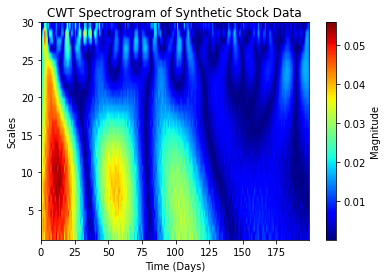

In [47]:
import matplotlib.pyplot as plt

# Just for visualization purposes, we'll visualize CWT results as DWT results might be smaller in size
plt.imshow(np.abs(cwtmatr), aspect='auto', cmap='jet', extent=[0, len(data), 1, 30])
plt.colorbar(label='Magnitude')
plt.ylabel('Scales')
plt.xlabel('Time (Days)')
plt.title('CWT Spectrogram of Synthetic Stock Data')
plt.show()


In [48]:
import numpy as np
import pandas as pd

# Generate synthetic stock data
np.random.seed(0)
days = 230  # 30 days buffer to get day-wise spectrogram for 200 days
synthetic_close = np.cumsum(np.random.randn(days) + 0.5) * 2 + 100
data = pd.DataFrame({'Close': synthetic_close})
data['LogReturn'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)


In [49]:
data

,Close,LogReturn
1,106.328419,0.017077
2,109.285895,0.027435
3,114.767681,0.048943
4,119.502797,0.040430
5,118.548242,-0.008020
...,...,...
225,353.562941,0.003191
226,354.875954,0.003707
227,356.340316,0.004118
228,356.145684,-0.000546


IndexError: index 20 is out of bounds for axis 0 with size 20

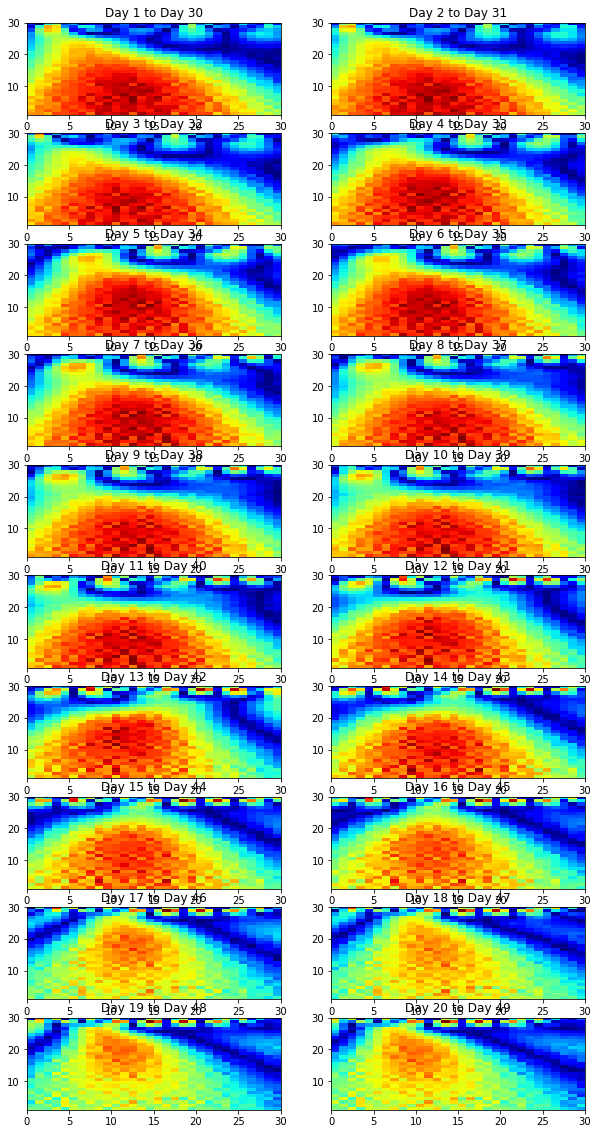

In [50]:
import pywt
import matplotlib.pyplot as plt

widths = np.arange(1, 30)

# Create a figure to plot the results
fig, axs = plt.subplots(10, 2, figsize=(10, 20))  # Example for 20 days. Adjust as needed.
axs = axs.ravel()

for start in range(0, 200):  # We go up to 200 to ensure we always have a 30-day window
    end = start + 30
    segment = data['LogReturn'].iloc[start:end]
    cwtmatr, _ = pywt.cwt(segment, widths, 'mexh')
    
    # Plot the results for each day
    ax = axs[start]
    ax.imshow(np.abs(cwtmatr), aspect='auto', cmap='jet', extent=[0, 30, 1, 30])
    ax.set_title(f"Day {start+1} to Day {end}")

plt.tight_layout()
plt.show()


In [51]:
import numpy as np
import pandas as pd

# Generate synthetic stock data
np.random.seed(0)
days = 260  # 30 days buffer to get day-wise spectrogram for 230 days
synthetic_open = np.cumsum(np.random.randn(days) + 0.5) * 2 + 100
synthetic_close = synthetic_open + np.random.randn(days)
synthetic_high = synthetic_open + abs(np.random.randn(days)) + 2
synthetic_low = synthetic_open - abs(np.random.randn(days)) - 2

data = pd.DataFrame({'Open': synthetic_open, 'Close': synthetic_close, 'High': synthetic_high, 'Low': synthetic_low})
data['LogReturn'] = np.log(data['Close'] / data['Open'])
data.dropna(inplace=True)


In [52]:
data

,Open,Close,High,Low,LogReturn
0,104.528105,103.339245,106.750710,101.038749,-0.011439
1,106.328419,105.821603,109.241498,103.807115,-0.004778
2,109.285895,108.689581,112.967113,106.673968,-0.005471
3,114.767681,114.715114,117.656653,111.426185,-0.000458
4,119.502797,117.566518,121.744915,117.025899,-0.016335
...,...,...,...,...,...
255,374.198728,374.374547,377.990056,371.133413,0.000470
256,373.747533,374.246224,375.806120,370.762216,0.001333
257,371.980805,373.028778,374.298348,369.213886,0.002813
258,369.814929,370.099208,373.447352,367.412303,0.000768


IndexError: index 20 is out of bounds for axis 0 with size 20

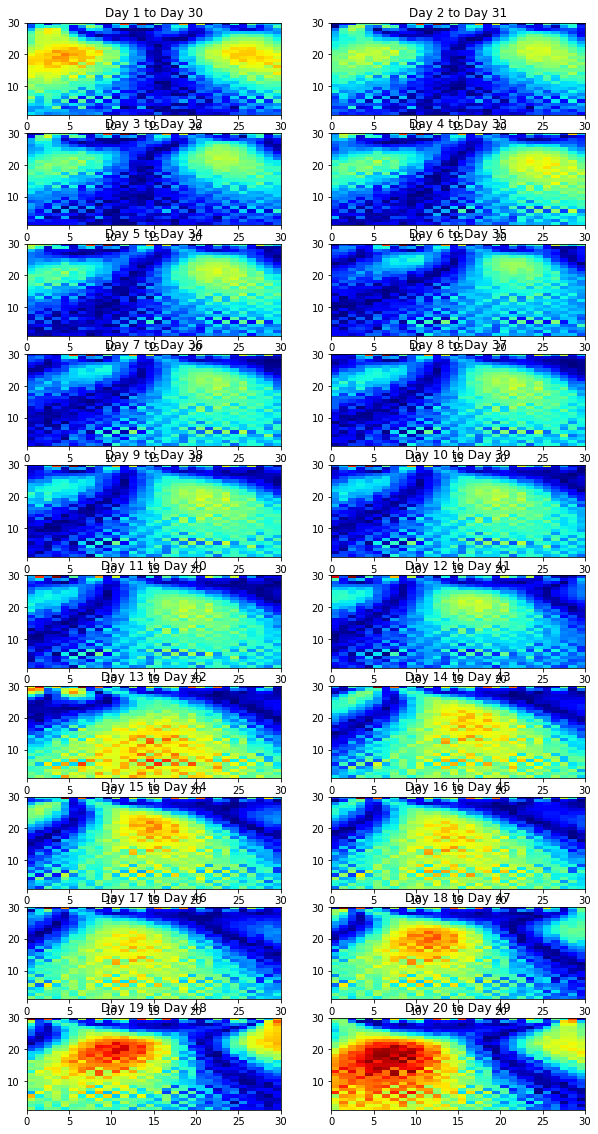

In [53]:
import pywt
import matplotlib.pyplot as plt

widths = np.arange(1, 31)

# Create a function for DWT feature extraction
def dwt_features(segment):
    coeffs = pywt.wavedec(segment, 'db1', level=4)
    features = np.concatenate([coeff for coeff in coeffs])
    return features

# Create a function to plot the CWT spectrogram
def plot_cwt(segment, ax):
    cwtmatr, _ = pywt.cwt(segment, widths, 'mexh')
    ax.imshow(np.abs(cwtmatr), aspect='auto', cmap='jet', extent=[0, 30, 1, 30])
    return ax

# Create a figure to plot the results
fig, axs = plt.subplots(10, 2, figsize=(10, 20))  # Example for 20 days. Adjust as needed.
axs = axs.ravel()

for start in range(0, 200):  # We go up to 200 to ensure we always have a 30-day window
    end = start + 30
    segment = data['LogReturn'].iloc[start:end]
    
    # DWT feature extraction
    features = dwt_features(segment)
    # For the sake of simplicity, we're not using these features in this example.
    # In real applications, you might use them as input to a machine learning model.
    
    # Plot the CWT spectrogram
    ax = axs[start]
    ax = plot_cwt(segment, ax)
    ax.set_title(f"Day {start+1} to Day {end}")

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

In [17]:
data = pd.read_csv("AAPL.csv")

In [18]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...,...
10775,2023-09-11,180.070007,180.300003,177.339996,179.360001,179.360001,58953100
10776,2023-09-12,179.490005,180.130005,174.820007,176.300003,176.300003,90370200
10777,2023-09-13,176.509995,177.300003,173.979996,174.210007,174.210007,84267900
10778,2023-09-14,174.000000,176.100006,173.580002,175.740005,175.740005,60895800


In [19]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

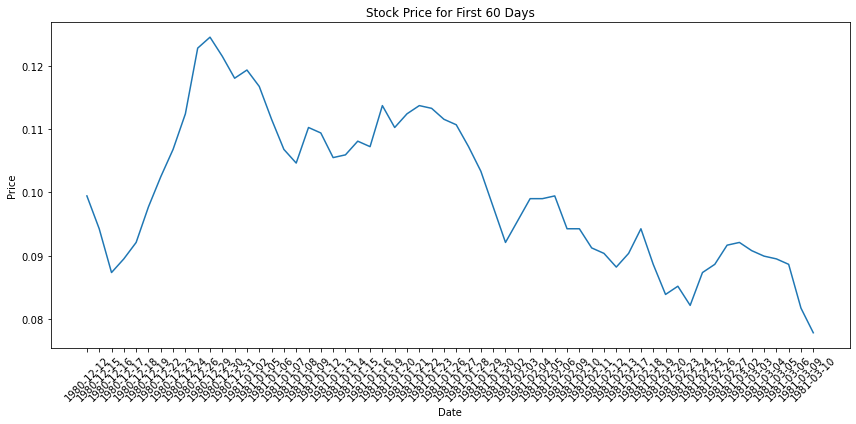

In [67]:
# Use the first 60 rows of data
df_60 = data.head(60)

# Plotting
plt.figure(figsize=(12,6))
plt.plot(df_60['Date'], df_60['Adj Close'], linestyle='-')
plt.xticks(rotation=45) # Rotate dates for better visibility
plt.title('Stock Price for First 60 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [68]:
df_60

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097720,48630400
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.102476,37363200
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106800,46950400
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.112421,48003200
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.122799,55574400


(array([4001., 4018., 4032., 4049., 4063., 4077.]),
 [Text(4001.0, 0, '1980-12-15'),
  Text(4018.0, 0, '1981-01-01'),
  Text(4032.0, 0, '1981-01-15'),
  Text(4049.0, 0, '1981-02-01'),
  Text(4063.0, 0, '1981-02-15'),
  Text(4077.0, 0, '1981-03-01')])

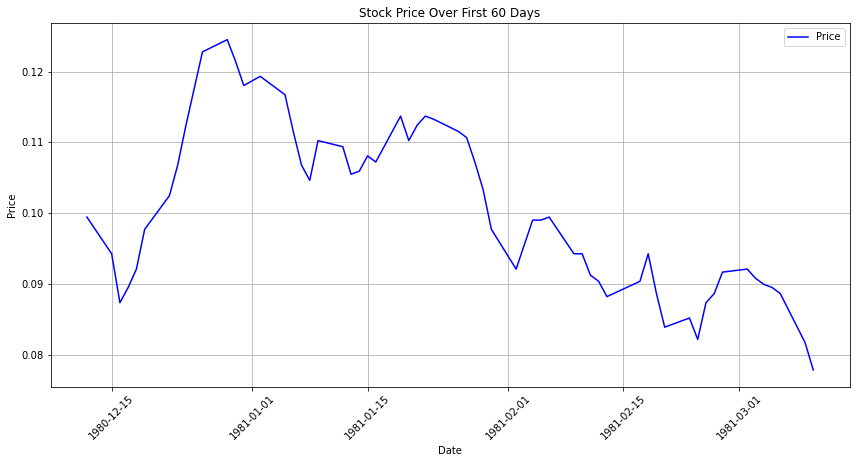

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('AAPL.csv')

# Ensure the 'date' column is interpreted as a date
data['Date'] = pd.to_datetime(data['Date'])

# Filter to keep only the first 60 rows
data = data.iloc[:60]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Adj Close'], label='Price', color='blue')
plt.title('Stock Price Over First 60 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)


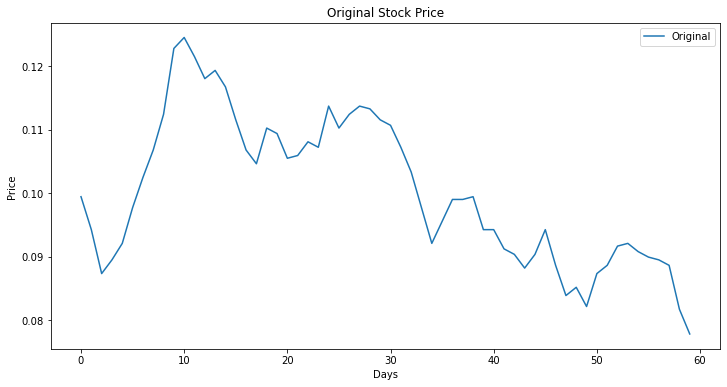

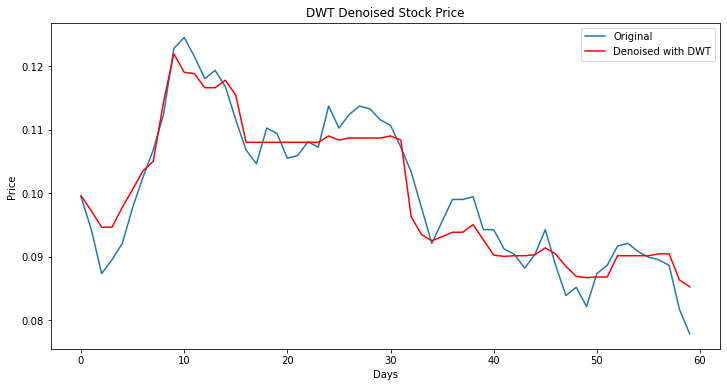

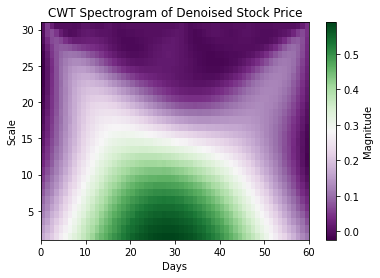

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 1. Read and visualize the data
data = pd.read_csv('AAPL.csv')
data = data.iloc[:60]
prices = data['Adj Close'].values

plt.figure(figsize=(12, 6))
plt.plot(prices, label="Original")
plt.title("Original Stock Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

# 2. Apply DWT for denoising
coeffs = pywt.wavedec(prices, 'db1')
coeffs[1:] = [pywt.threshold(i, value=0.5 * max(i)) for i in coeffs[1:]]
reconstructed_signal = pywt.waverec(coeffs, 'db1')

plt.figure(figsize=(12, 6))
plt.plot(prices, label="Original")
plt.plot(reconstructed_signal, label="Denoised with DWT", color='r')
plt.title("DWT Denoised Stock Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

# 3. Apply CWT and visualize the spectrogram
widths = np.arange(1, 31)
cwtmatr, _ = pywt.cwt(reconstructed_signal, widths, 'mexh')
plt.imshow(cwtmatr, aspect='auto', extent=[0, 60, 1, 31], cmap='PRGn')
plt.colorbar(label="Magnitude")
plt.ylabel("Scale")
plt.xlabel("Days")
plt.title("CWT Spectrogram of Denoised Stock Price")
plt.show()


In [76]:
import pandas as pd
import numpy as np

np.random.seed(42)  # for reproducibility
dates = pd.date_range(start="2000-01-01", periods=10000)
prices = np.random.randn(10000).cumsum() + 50  # create a random walk starting at a price of 50

df = pd.DataFrame({'date': dates, 'price': prices})
df.to_csv('price.csv', index=False)


In [77]:
df

,date,price
0,2000-01-01,50.496714
1,2000-01-02,50.358450
2,2000-01-03,51.006138
3,2000-01-04,52.529168
4,2000-01-05,52.295015
...,...,...
9995,2027-05-14,30.203674
9996,2027-05-15,28.205329
9997,2027-05-16,27.500012
9998,2027-05-17,27.995778


In [80]:
def create_dataset(stock_data, look_back, label_window):
    X, y = [], []
    for i in range(len(stock_data) - look_back - label_window + 1):
        X.append(stock_data[i:(i+look_back)])
        
        if stock_data[i + look_back + label_window - 1] > stock_data[i + look_back - 1]:
            y.append('Up')
        else:
            y.append('Down')
    return np.array(X), np.array(y)

data = pd.read_csv('price.csv')['price'].values

look_backs = [60]
label_windows = [1]

datasets = {}

for lb in look_backs:
    for lw in label_windows:
        X, y = create_dataset(data, lb, lw)
        datasets[(lb, lw)] = (X, y)


In [81]:
datasets

{(60,
  1): (array([[50.49671415, 50.35844985, 51.00613839, ..., 39.41391046,
          39.74517389, 40.72071902],
         [50.35844985, 51.00613839, 52.52916825, ..., 39.74517389,
          40.72071902, 40.24154478],
         [51.00613839, 52.52916825, 52.29501487, ..., 40.72071902,
          40.24154478, 40.0558858 ],
         ...,
         [34.13148672, 32.86852378, 30.95736446, ..., 28.90257192,
          30.20367398, 28.20532901],
         [32.86852378, 30.95736446, 30.38991718, ..., 30.20367398,
          28.20532901, 27.50001229],
         [30.95736446, 30.38991718, 32.19144558, ..., 28.20532901,
          27.50001229, 27.99577786]]), array(['Down', 'Down', 'Down', ..., 'Down', 'Up', 'Up'], dtype='<U4'))}

In [82]:
import pandas as pd

def save_datasets_to_csv(datasets):
    for (look_back, label_window), (X, y) in datasets.items():
        df = pd.DataFrame(X)
        df['label'] = y
        filename = f'dataset_lookback_{look_back}_labelwindow_{label_window}.csv'
        df.to_csv(filename, index=False)
        print(f"Saved: {filename}")

save_datasets_to_csv(datasets)


Saved: dataset_lookback_60_labelwindow_1.csv


In [2]:
import pandas as pd


In [3]:
new_data = pd.read_csv("dataset_lookback_60_labelwindow_1.csv")

In [4]:
new_data

,Date,features,labels
0,1981-03-10,[0.09945 0.094261 0.087343 0.089504 0.092099 ...,Down
1,1981-03-11,[0.094261 0.087343 0.089504 0.092099 0.09772 ...,Up
2,1981-03-12,[0.087343 0.089504 0.092099 0.09772 0.102476 ...,Down
3,1981-03-13,[0.089504 0.092099 0.09772 0.102476 0.1068 ...,Up
4,1981-03-16,[0.092099 0.09772 0.102476 0.1068 0.112421 ...,Up
...,...,...,...
9530,2018-12-21,[53.860542 54.049706 54.413639 54.897301 55.56...,Down
9531,2018-12-24,[54.049706 54.413639 54.897301 55.565311 54.58...,Up
9532,2018-12-26,[54.413639 54.897301 55.565311 54.588432 53.70...,Down
9533,2018-12-27,[54.897301 55.565311 54.588432 53.702515 53.57...,Up


In [7]:
new_data['labels'].value_counts()

Down    4835
Up      4700
Name: labels, dtype: int64

In [14]:
# Extract and Convert Features
features_str = new_data.iloc[0]['features'].strip("[]")  # Remove square brackets
features_list = [float(x) for x in features_str.split()]

# Print the first 60 features
print(features_list[:60])

[0.09945, 0.094261, 0.087343, 0.089504, 0.092099, 0.09772, 0.102476, 0.1068, 0.112421, 0.122799, 0.124528, 0.121502, 0.118043, 0.11934, 0.116746, 0.111556, 0.1068, 0.104639, 0.110259, 0.109395, 0.105503, 0.105936, 0.108098, 0.107233, 0.113718, 0.110259, 0.112421, 0.113718, 0.113286, 0.111556, 0.110692, 0.107233, 0.103342, 0.09772, 0.092099, 0.095558, 0.099017, 0.099017, 0.09945, 0.094261, 0.094261, 0.091235, 0.090369, 0.088207, 0.090369, 0.094261, 0.08864, 0.083884, 0.085181, 0.082154, 0.087343, 0.08864, 0.091667, 0.092099, 0.090802, 0.089937, 0.089504, 0.08864, 0.081722, 0.07783]


In [25]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...,...
10775,2023-09-11,180.070007,180.300003,177.339996,179.360001,179.360001,58953100
10776,2023-09-12,179.490005,180.130005,174.820007,176.300003,176.300003,90370200
10777,2023-09-13,176.509995,177.300003,173.979996,174.210007,174.210007,84267900
10778,2023-09-14,174.000000,176.100006,173.580002,175.740005,175.740005,60895800


In [37]:
closing_prices = data['Adj Close'][:60].values


In [39]:
type(closing_prices)

numpy.ndarray

/Users/rohitgulve/opt/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


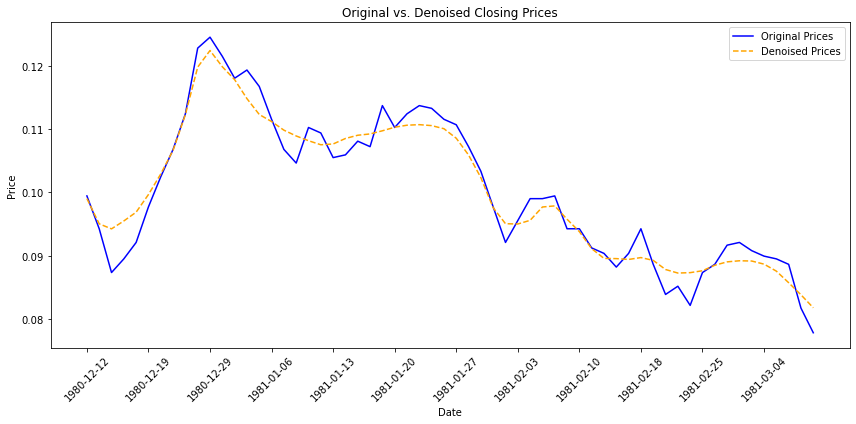

In [34]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Load the Data
closing_prices = data['Adj Close'][:60].values

# DWT Denoising
def wavelet_denoising(signal, wavelet='db4', level=5):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    
    # Estimating noise standard deviation from the detail coefficients at the last level
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(signal)))
    
    coeffs[1:] = [pywt.threshold(i, value=threshold, mode='soft') for i in coeffs[1:]]
    return pywt.waverec(coeffs, wavelet)

denoised_prices = wavelet_denoising(closing_prices)

# Visualization
dates = data['Date'][:60].values
plt.figure(figsize=(12,6))
plt.plot(dates, closing_prices, label='Original Prices', color='blue')
plt.plot(dates, denoised_prices, label='Denoised Prices', color='orange', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original vs. Denoised Closing Prices')
plt.xticks(dates[::5], rotation=45)  # show every 5th date for clarity
plt.tight_layout()
plt.show()


/Users/rohitgulve/opt/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


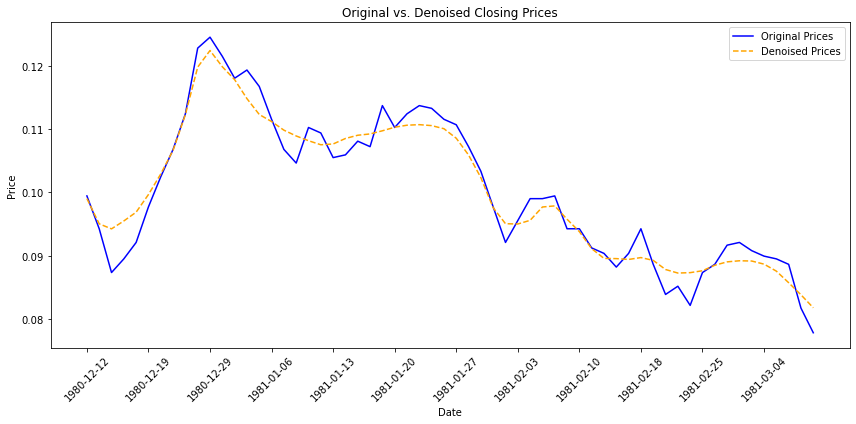

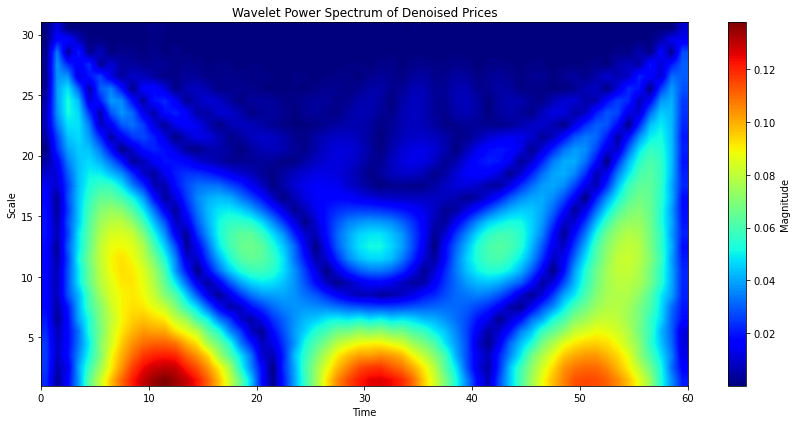

In [36]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Load the Data (assuming data is already loaded as DataFrame in 'data' variable)
closing_prices = data['Adj Close'][:60].values

# DWT Denoising
def wavelet_denoising(signal, wavelet='db4', level=5):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    
    # Estimating noise standard deviation from the detail coefficients at the last level
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(signal)))
    
    coeffs[1:] = [pywt.threshold(i, value=threshold, mode='soft') for i in coeffs[1:]]
    return pywt.waverec(coeffs, wavelet)

denoised_prices = wavelet_denoising(closing_prices)

# CWT Analysis
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(denoised_prices, widths, 'morl')

# Visualization of DWT Denoising
dates = data['Date'][:60].values
plt.figure(figsize=(12,6))
plt.plot(dates, closing_prices, label='Original Prices', color='blue')
plt.plot(dates, denoised_prices, label='Denoised Prices', color='orange', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original vs. Denoised Closing Prices')
plt.xticks(dates[::5], rotation=45)  # show every 5th date for clarity
plt.tight_layout()
plt.show()

# Visualization of CWT Analysis
plt.figure(figsize=(12,6))
plt.imshow(np.abs(cwtmatr), aspect='auto', extent=[0, len(denoised_prices), 1, 31], cmap='jet', interpolation='bilinear')
plt.colorbar(label='Magnitude')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Wavelet Power Spectrum of Denoised Prices')
plt.tight_layout()
plt.show()
